# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a data story product with a data set of your choosing**. You can choose any data set you can find on the Internet or a data set related to your current line of work. 



**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have 
seen throughout the course.**

This exercise is about creating a quickly consumable product; Do **NOT** create a report or lengthy power point presentation. You can choose a **poster format** or **few slides** to tell your story (with a unique angle) from the conclusions you derive for the audience you have decided. 



Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in THIS exercise notebook** to create your visualizations, and save them under the `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, Adobe, etc.) by **pasting your visualizations and creating all necessary elements** (captions, text annotations, layout, etc.) 

4. Save your end product as a **PDF FILE** and upload it to your exercises folder (**MAKE SURE TO NAME IT L8_Exercise.pdf**)

You should start with a clear message or angle in your mind for your audience, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)** in a nice layout. Make sure to have a **clean layout** they can follow, and **enough text annotations and captions** to make your message/point clear. 


Look at the **good and bad examples** in the lab notebook and consult the links. 

You can choose any type of visualization that you believe will be most **effective** for the type of data, characteristics of the data, visual tasks, and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; **make sure to use every principle you have learned in this course.** 

---

Following is to show how to save a plot to a file: 

In [333]:
# this is how you save a plot to a file
library(ggplot2)

# comment this out to see the plot in the notebook 
png(filename="myplot.png")

# your plot here..
qplot(carat, price, data = diamonds)

# comment this out to see the plot in the notebook
dev.off()

png 
  2

Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

In [334]:
# Read your data here; 

# Clean it up, reformat it, filter it, sort it, group it, etc.

# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere

# <- ALL YOUR CODE BELOW THIS POINT ->



# Performance of USA in Summer Olympics

Here, we have taken a olympics event data set where we have the information of the event place and medals won.
we are trying to find the performance of USA in Summer Olympics using this Olympic data set

In [335]:
library(readr)
library(plyr)
library(dplyr)
library(tidyr)
library(tidyverse)
library(lubridate)
library(ggplot2)
library(viridis)

In [ ]:
olympic_data <- read.csv("athlete_events.csv")

## code cleaning

below we are renaming certain team names and also removing the na values from the medal column

In [408]:

olympic_data$Team <- olympic_data$Team <- str_replace(olympic_data$Team , "Soviet Union", "Russia") 
olympic_data$Team <- olympic_data$Team <- str_replace(olympic_data$Team , "United States-1", "United States") 
olympic_data$Team <- olympic_data$Team <- str_replace(olympic_data$Team , "United States-2", "United States") 
olympic_data$Team <- olympic_data$Team <- str_replace(olympic_data$Team , "United States-3", "United States") 
olympic_data$Team <- olympic_data$Team <- str_replace(olympic_data$Team , "United States-4", "United States") 


In [409]:
str(olympic_data)

'data.frame':	271116 obs. of  15 variables:
 $ ID    : int  1 2 3 4 5 5 5 5 5 5 ...
 $ Name  : Factor w/ 134732 levels "  Gabrielle Marie \"Gabby\" Adcock (White-)",..: 8 9 44318 29412 21469 21469 21469 21469 21469 21469 ...
 $ Sex   : Factor w/ 2 levels "F","M": 2 2 2 2 1 1 1 1 1 1 ...
 $ Age   : int  24 23 24 34 21 21 25 25 27 27 ...
 $ Height: int  180 170 NA NA 185 185 185 185 185 185 ...
 $ Weight: num  80 60 NA NA 82 82 82 82 82 82 ...
 $ Team  : chr  "China" "China" "Denmark" "Denmark/Sweden" ...
 $ NOC   : Factor w/ 230 levels "AFG","AHO","ALB",..: 42 42 56 56 146 146 146 146 146 146 ...
 $ Games : Factor w/ 51 levels "1896 Summer",..: 38 49 7 2 37 37 39 39 40 40 ...
 $ Year  : int  1992 2012 1920 1900 1988 1988 1992 1992 1994 1994 ...
 $ Season: Factor w/ 2 levels "Summer","Winter": 1 1 1 1 2 2 2 2 2 2 ...
 $ City  : Factor w/ 42 levels "Albertville",..: 6 18 3 27 9 9 1 1 17 17 ...
 $ Sport : Factor w/ 66 levels "Aeronautics",..: 9 33 25 62 54 54 54 54 54 54 ...
 $ Event : Fac

In [410]:
olympic_data <- olympic_data %>% drop_na(Medal)


In [411]:
olympic_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<int>,<fct>,<fct>,<int>,<int>,<dbl>,<chr>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
38,15,Arvo Ossian Aaltonen,M,30,NA,NA,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
39,15,Arvo Ossian Aaltonen,M,30,NA,NA,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,16,Juhamatti Tapio Aaltonen,M,28,184,85,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
42,17,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
43,17,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
45,17,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
49,17,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
51,17,Paavo Johannes Aaltonen,M,32,175,64,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze


# # Data Visualization

In [498]:
df_olymp <- olympic_data %>% 
    group_by(Team) %>% 
    filter( Season == 'Summer') %>% 
    count() %>% arrange_(~ desc(n)) %>% 
    rename('count' = n)  

head(df_olymp)

world_map <- map_data("world")
world_map$region <- str_replace(world_map$region , "USA", "United States")
world_map$region <- str_replace(world_map$region , "UK", "Great Britain")
head(world_map)


Team,count
<chr>,<int>
United States,4740
Russia,2955
Germany,1687
Great Britain,1598
France,1408
Italy,1384


long,lat,group,order,region,subregion
<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
-69.89912,12.45200,1,1,Aruba,NA
-69.89571,12.42300,1,2,Aruba,NA
-69.94219,12.43853,1,3,Aruba,NA
-70.00415,12.50049,1,4,Aruba,NA
-70.06612,12.54697,1,5,Aruba,NA
-70.05088,12.59707,1,6,Aruba,NA


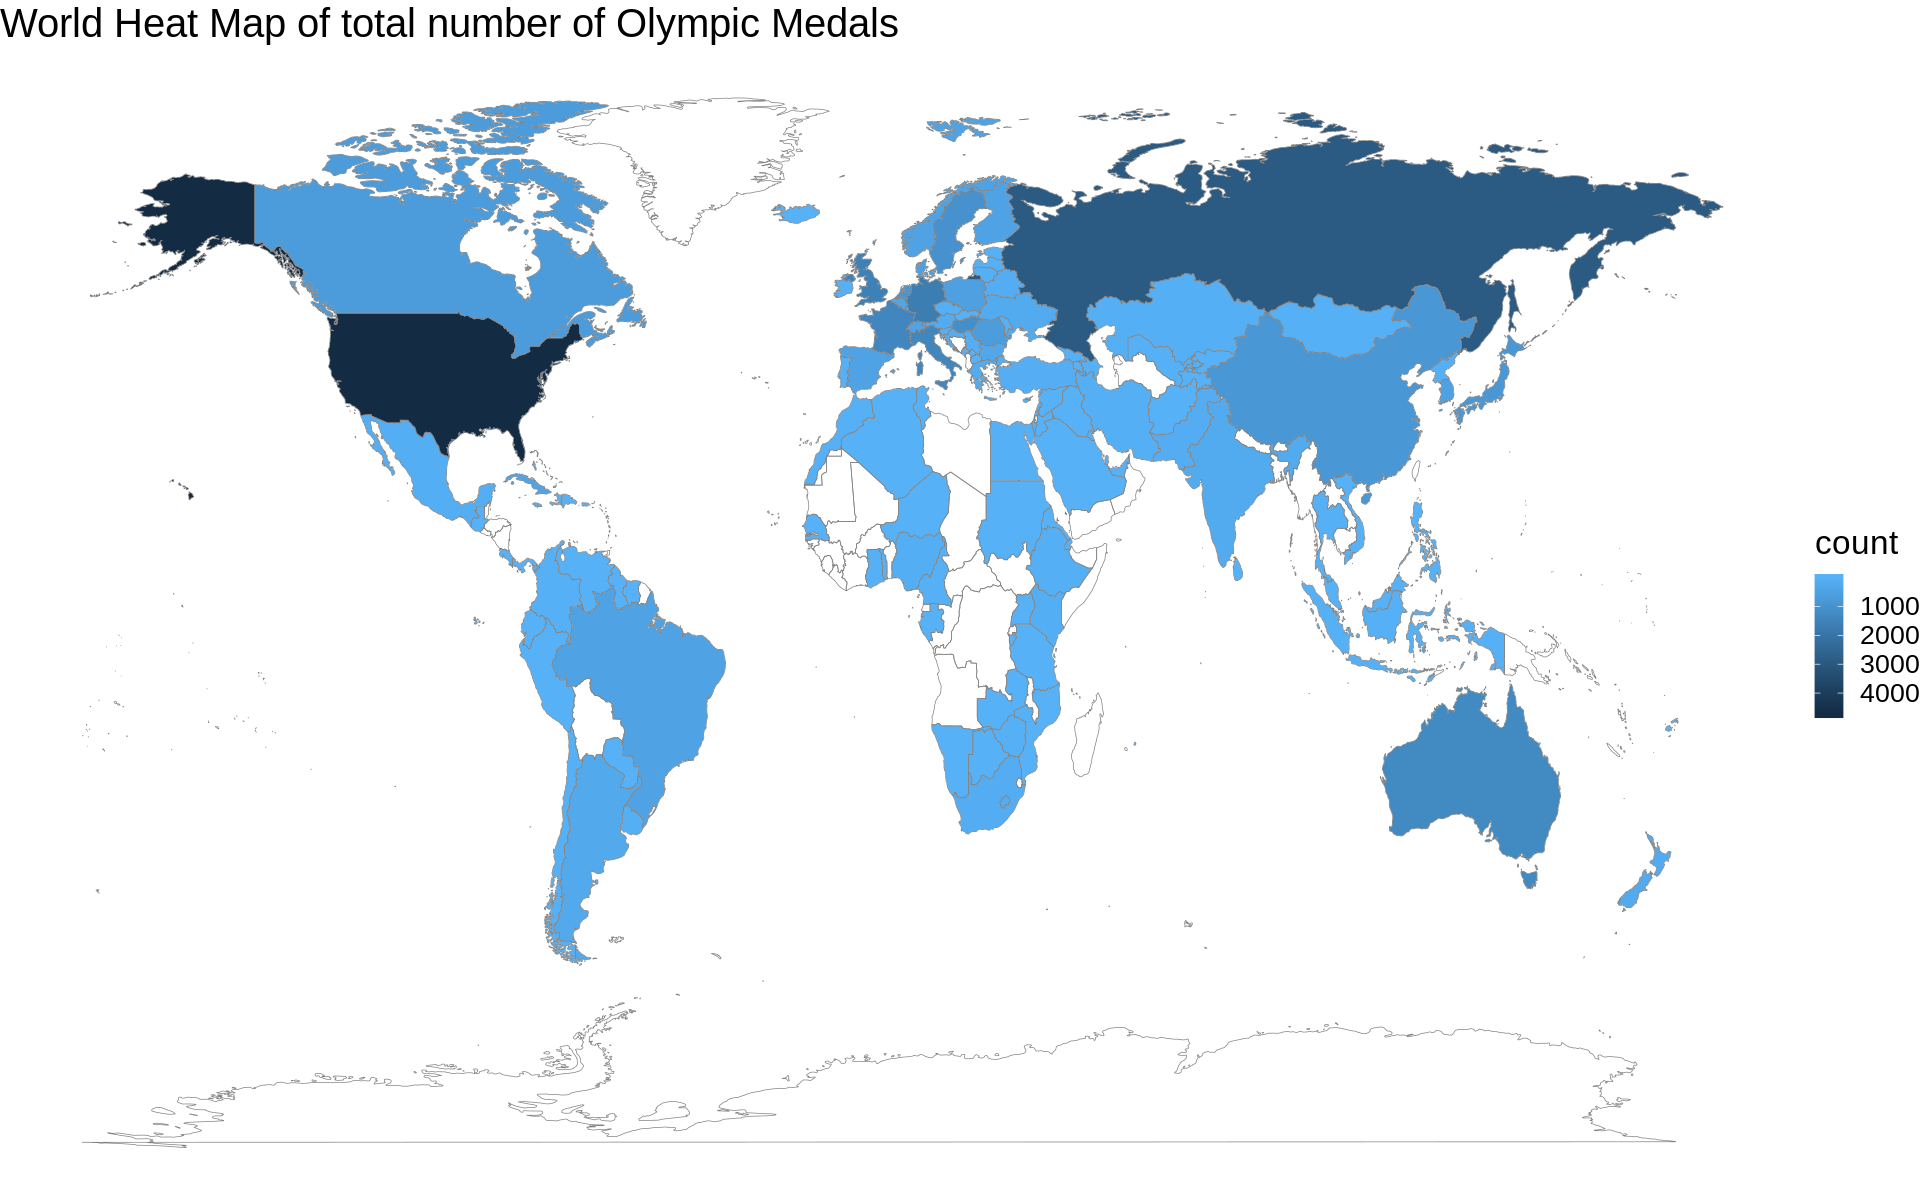

In [499]:

gg <- ggplot(data=df_olymp) + 

geom_map(map=world_map, aes(map_id=Team, fill=count), color="white", size=0.1) +
expand_limits(x=world_map$long, y=world_map$lat) + 
scale_fill_continuous(trans="reverse") +
borders("world",size=0.2) +
ggtitle("World Heat Map of total number of Olympic Medals") +

theme_void() +
 theme(text =element_text (size = 20))

gg

This world heat map represents the total number of olympic medal by all countries. Here we can clearly see that United States looks dense. Which implies that United states has the highest medals in olympics

In [412]:


top_countries <- olympic_data %>% 
    group_by(Team,Medal) %>% 
    filter( Team == 'United States' | Team == 'Russia' | Team == 'Germany' | Team == 'Italy' | Team == 'Great Britain' ) %>% 
    count() %>% arrange_(~ desc(n)) %>% 
    rename('count' = n)  

top_countries


Team,Medal,count
<chr>,<fct>,<int>
United States,Gold,2529
United States,Silver,1559
Russia,Gold,1424
United States,Bronze,1287
Russia,Bronze,1070
Russia,Silver,1067
Germany,Gold,679
Germany,Bronze,678
Germany,Silver,627


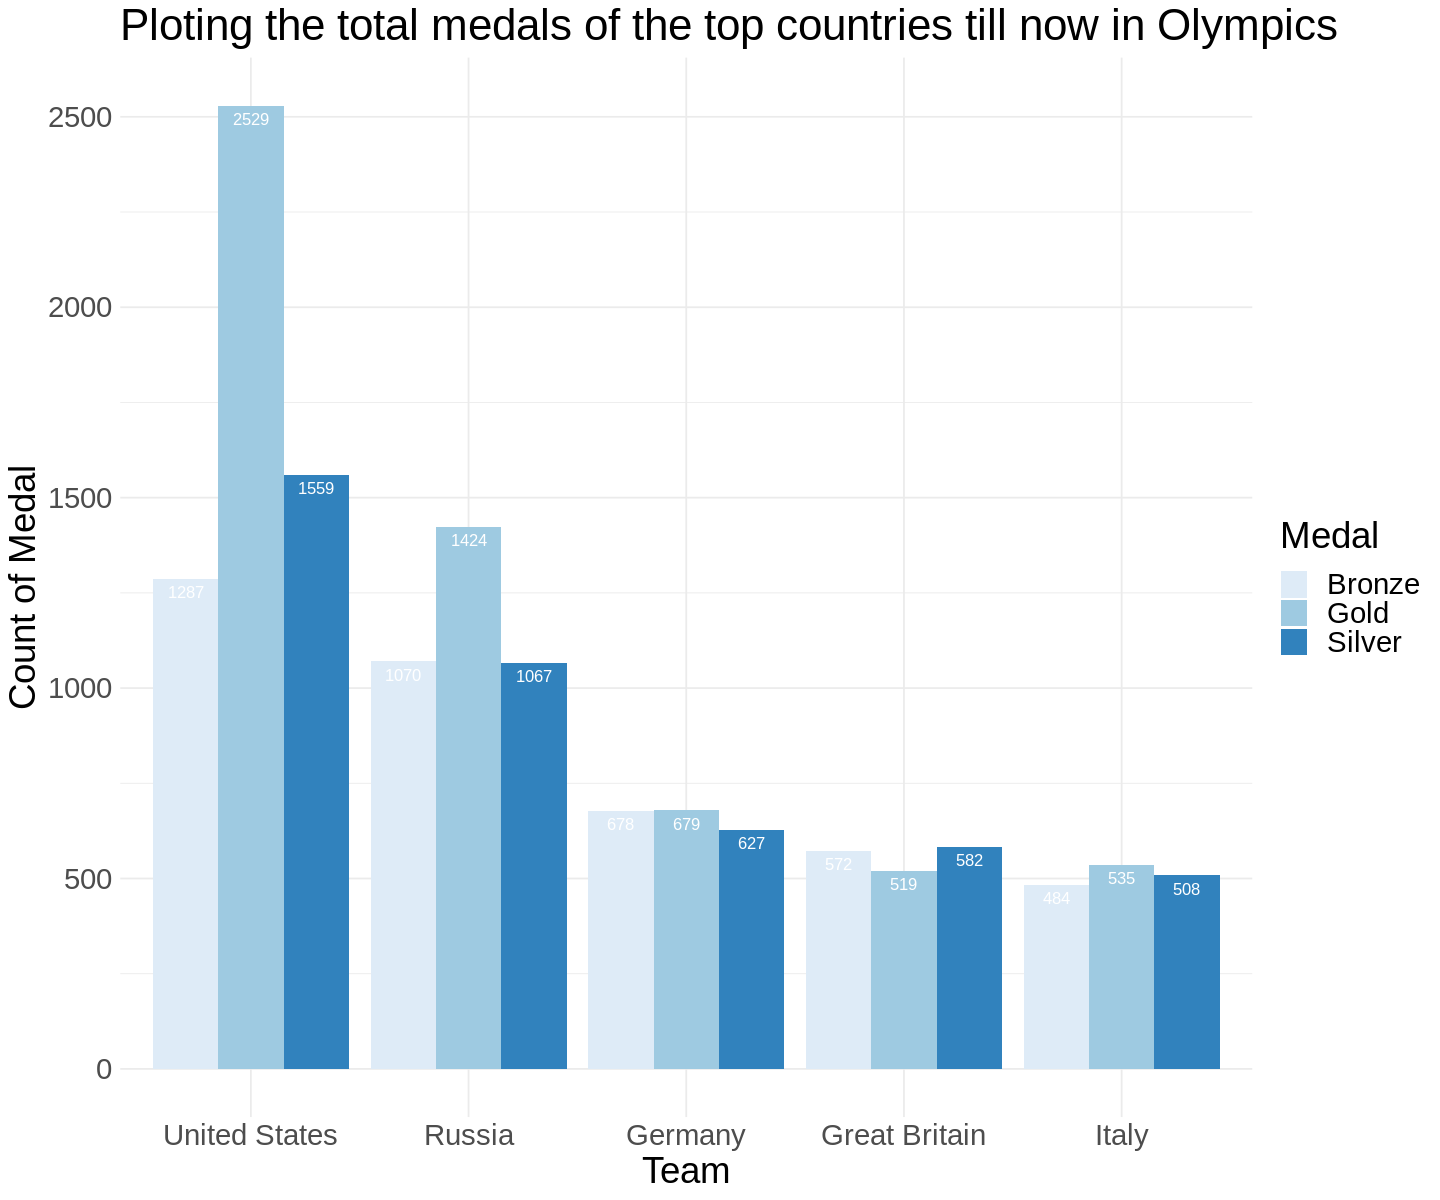

In [462]:
ggplot(data=top_countries, aes(x=fct_rev(fct_reorder(Team,count)), y=count, fill=Medal)) +
    geom_bar(stat="identity", position=position_dodge())+
    geom_text(aes(label=count), vjust=1.6, color="white",
            position = position_dodge(0.9), size=3.5)+
    ggtitle("Ploting the total medals of the top countries till now in Olympics") +
    xlab("Team") + ylab("Count of Medal") +
    scale_fill_brewer(palette="Blues") +
    theme_minimal() +
 theme(text =element_text (size = 22))

we are plotting the medal run of the top 5 countries through out the year. From this we can say that United States  stands tall among all countries.

In [469]:
gold_medal <- olympic_data %>% 
    group_by(Team,Medal,Year) %>% 
    filter( Medal =='Gold'&& Season == 'Summer' && (Team == 'United States' | Team == 'Russia' | Team == 'Germany' | Team == 'Italy' | Team == 'Great Britain') ) %>% 
    count() %>% arrange_(~ desc(n)) %>% 
    rename('count' = n)  

head(gold_medal)


silver_medal <- olympic_data %>% 
    group_by(Team,Medal,Year) %>% 
    filter( Medal =='Silver'&& Season == 'Summer' && (Team == 'United States' | Team == 'Russia' | Team == 'Germany' | Team == 'Italy' | Team == 'Great Britain') ) %>% 
    count() %>% arrange_(~ desc(n)) %>% 
    rename('count' = n)  

head(silver_medal)


bronze_medal <- olympic_data %>% 
    group_by(Team,Medal,Year) %>% 
    filter( Medal =='Bronze'&& Season == 'Summer' && (Team == 'United States' | Team == 'Russia' | Team == 'Germany' | Team == 'Italy' | Team == 'Great Britain') ) %>% 
    count() %>% arrange_(~ desc(n)) %>% 
    rename('count' = n)  

head(bronze_medal)

Team,Medal,Year,count
<chr>,<fct>,<int>,<int>
Russia,Gold,1980,201
United States,Gold,1984,190
Russia,Gold,1988,168
United States,Gold,1996,159
United States,Gold,2012,145
Russia,Gold,1972,141


Team,Medal,Year,count
<chr>,<fct>,<int>,<int>
Russia,Silver,1980,156
United States,Silver,1984,121
United States,Silver,2008,110
Russia,Silver,1976,100
Russia,Silver,1988,77
United States,Silver,2004,75


Team,Medal,Year,count
<chr>,<fct>,<int>,<int>
Russia,Bronze,1980,131
Russia,Bronze,1988,107
Russia,Bronze,2004,95
Russia,Bronze,1976,88
United States,Bronze,1992,87
United States,Bronze,2008,80


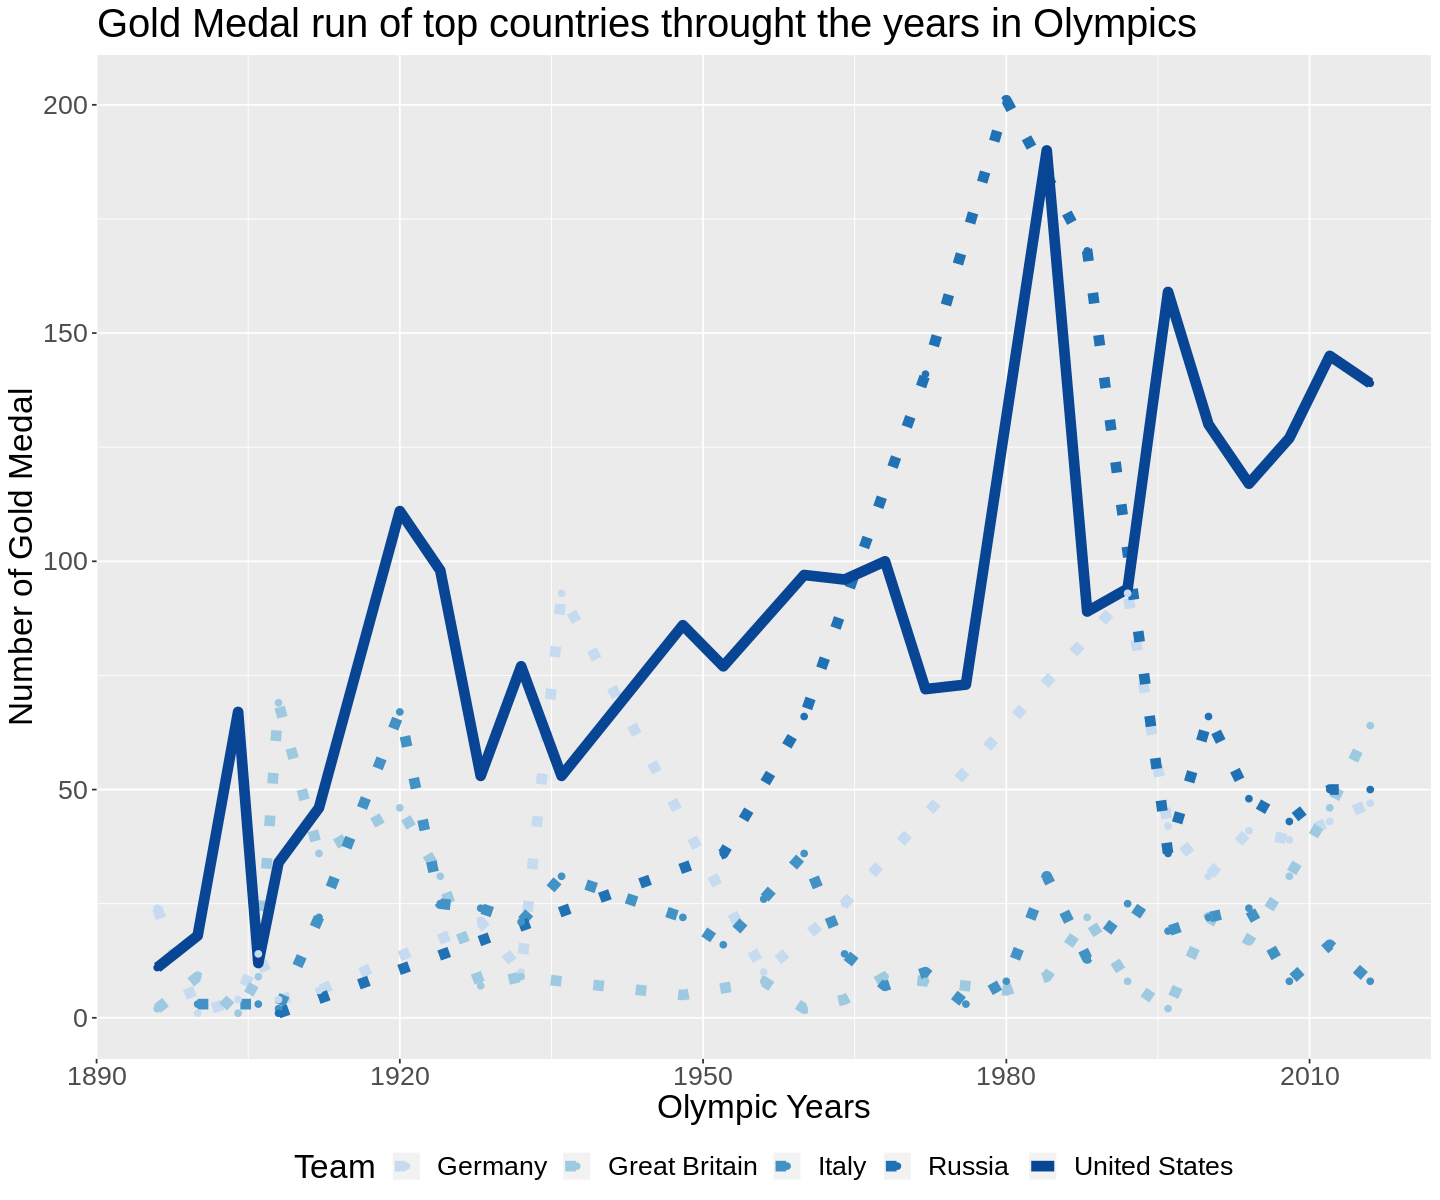

In [486]:
my_colors <- RColorBrewer::brewer.pal(8, "Blues")[1:8]

ggplot(gold_medal, aes(x=Year, count, color= Team, linetype = Team)) +
    # geom_line function is used to plot line plot
    geom_line(size = 3)+
    geom_point() +
    scale_color_manual(values=c(my_colors[3],my_colors[4],my_colors[6],my_colors[7],my_colors[8])) +
    scale_linetype_manual(values = c("United States" = "solid", "Russia" = "dotted", "Germany" = "dotted", "Italy" = "dotted", "Great Britain" = "dotted")) +
    theme(legend.position="bottom") +
    ggtitle("Gold Medal run of top countries throught the years in Olympics") +
    xlab("Olympic Years") + ylab("Number of Gold Medal") +
 theme(text =element_text (size = 20))
  



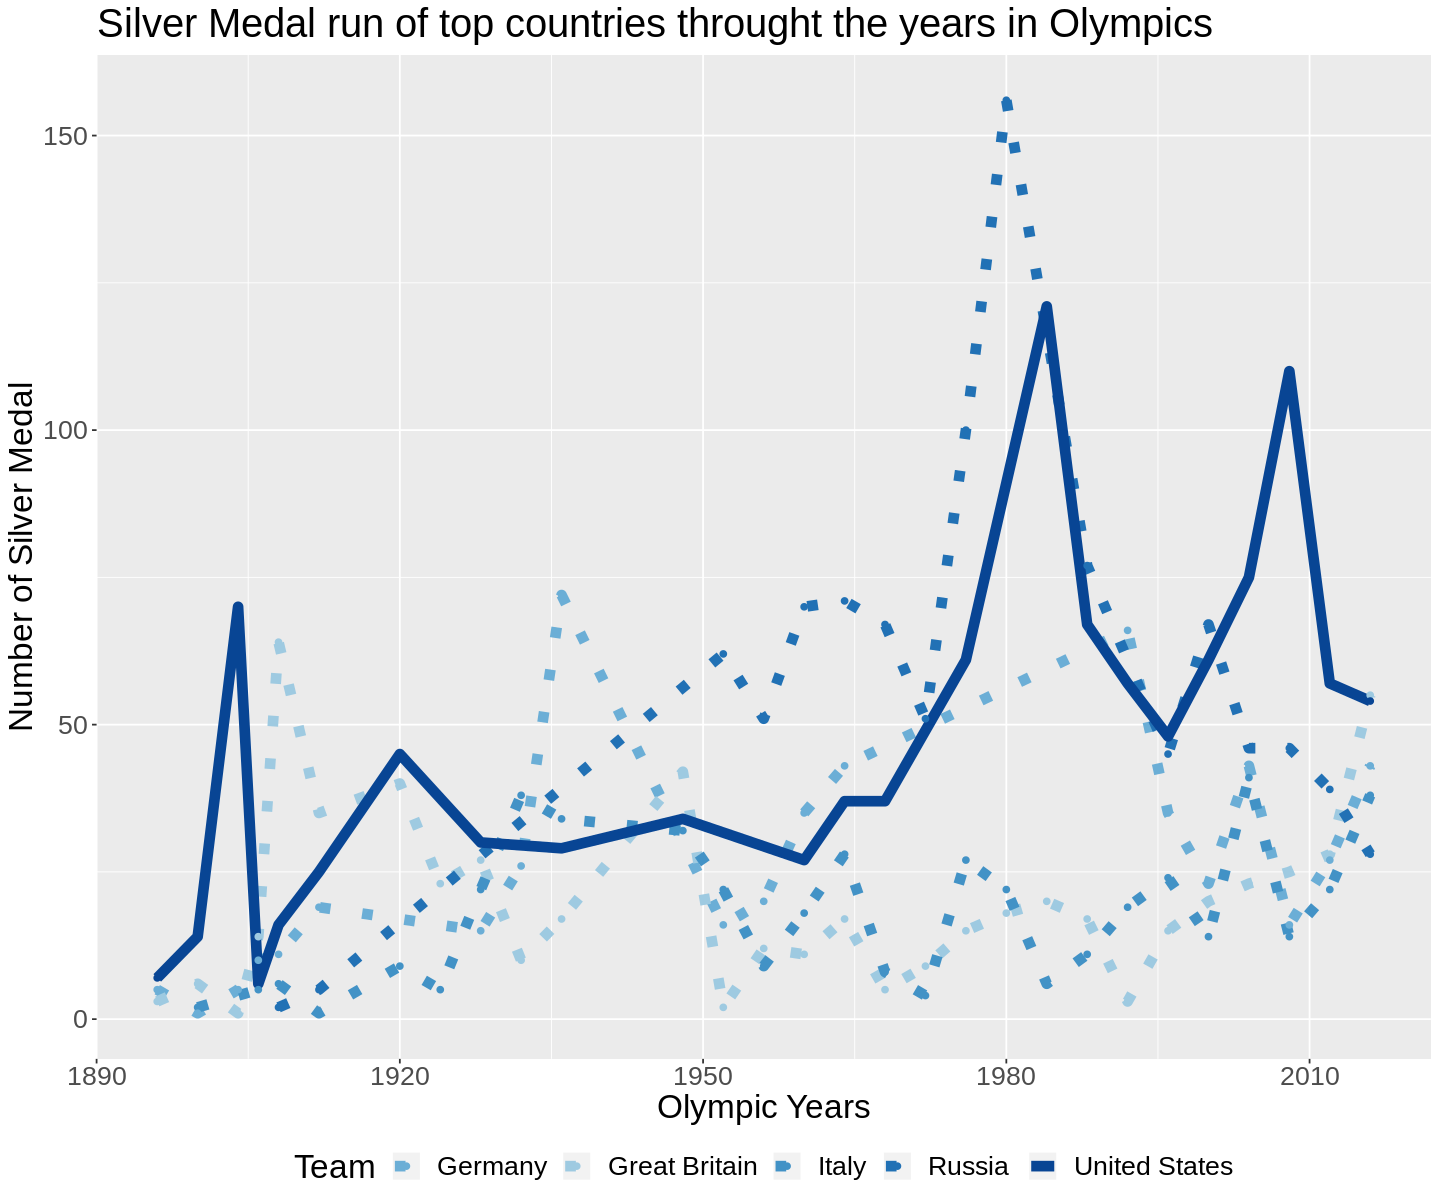

In [487]:
ggplot(silver_medal, aes(x=Year, count, color= Team, linetype = Team)) +
    # geom_line function is used to plot line plot
    geom_line(size = 3)+
    geom_point() +
    scale_color_manual(values=c(my_colors[5],my_colors[4],my_colors[6],my_colors[7],my_colors[8])) +
    scale_linetype_manual(values = c("United States" = "solid", "Russia" = "dotted", "Germany" = "dotted", "Italy" = "dotted", "Great Britain" = "dotted")) +
    theme(legend.position="bottom") +
    ggtitle("Silver Medal run of top countries throught the years in Olympics") +
    xlab("Olympic Years") + ylab("Number of Silver Medal") +
 theme(text =element_text (size = 20))

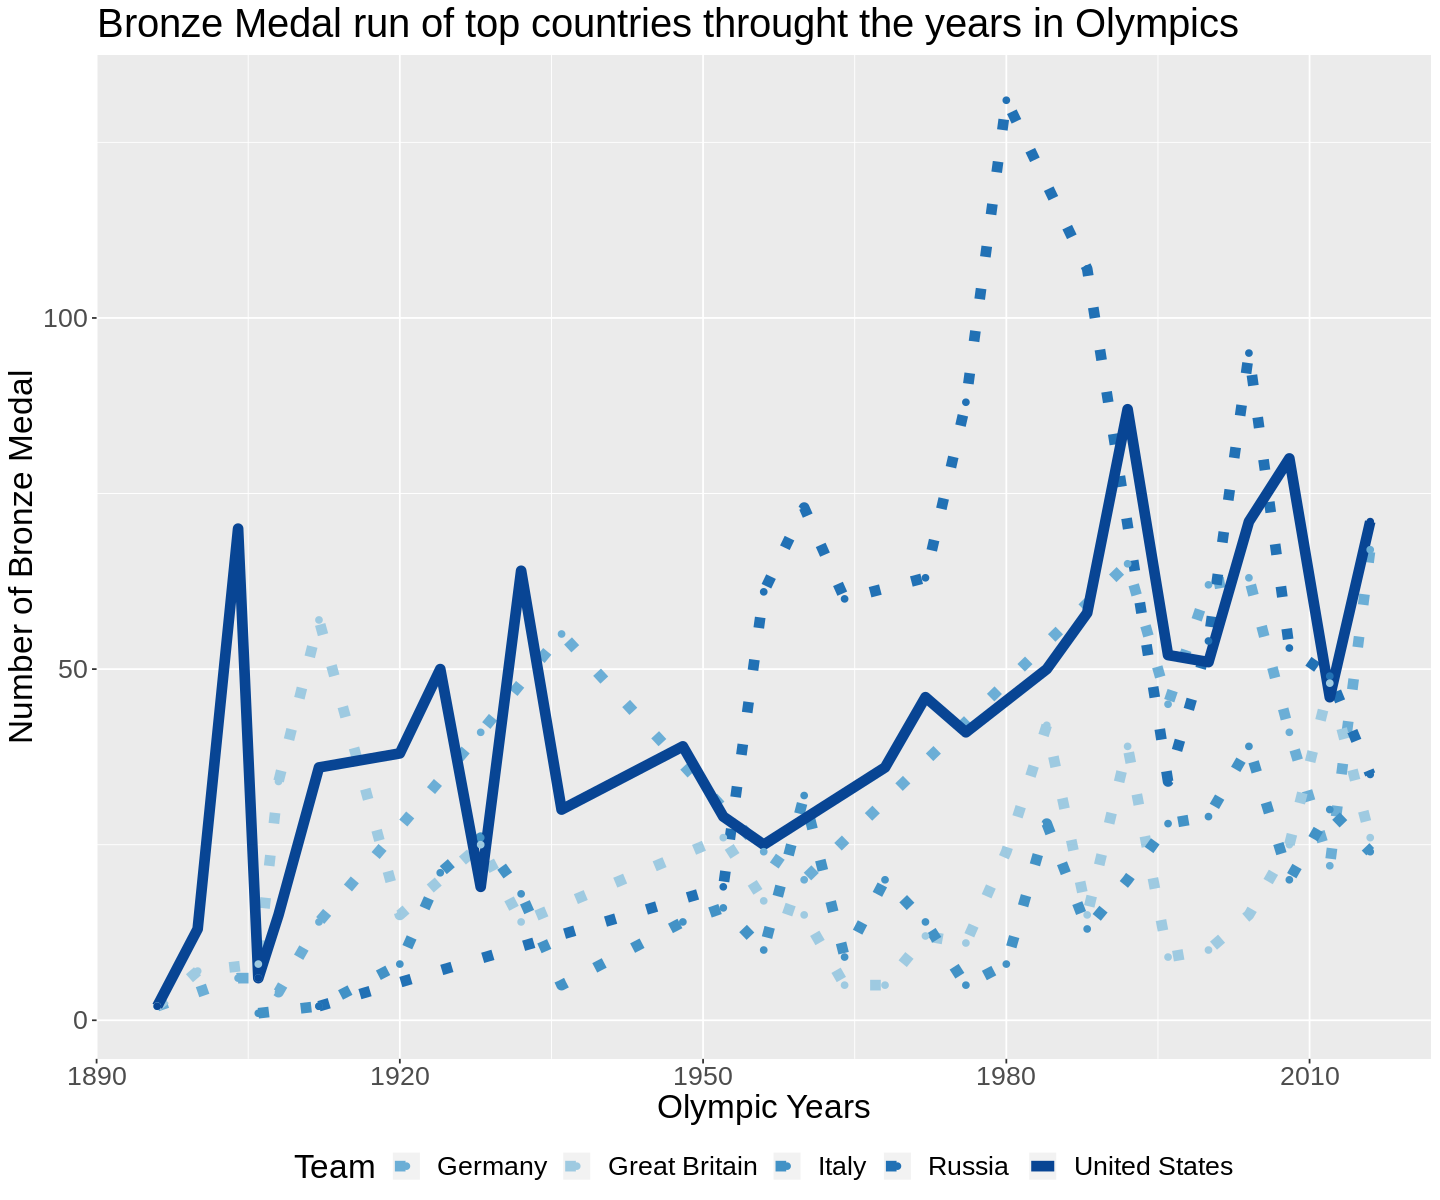

In [492]:
    # geom_line function is used to plot line plot
    ggplot(bronze_medal, aes(x=Year, count, color= Team, linetype = Team)) +
    geom_line(size = 3)+
    geom_point() +
    scale_color_manual(values=c(my_colors[5],my_colors[4],my_colors[6],my_colors[7],my_colors[8])) +
    scale_linetype_manual(values = c("United States" = "solid", "Russia" = "dotted", "Germany" = "dotted", "Italy" = "dotted", "Great Britain" = "dotted")) +
    theme(legend.position="bottom") +
    ggtitle("Bronze Medal run of top countries throught the years in Olympics") +
    xlab("Olympic Years") + ylab("Number of Bronze Medal") +
 theme(text =element_text (size = 20))

Here we can see the graphs of gold, Silver and Bronze medal run throughout the years. We can see that USA has a good run of Gold medals and conquered the Olympics in Gold medal through out the years except around 1980 year where Russia performed better than USA

In [416]:
us_gender_medal  <- olympic_data %>% 
    group_by(Team,Sex,Medal,Year) %>% 
    filter( Medal =='Gold'&& Team == 'United States' && Season == 'Summer' ) %>% 
    count() %>% arrange_(~ desc(n)) %>% 
    rename('count' = n)  

head(us_gender_medal)


Team,Sex,Medal,Year,count
<chr>,<fct>,<fct>,<int>,<int>
United States,M,Gold,1984,118
United States,M,Gold,1920,104
United States,F,Gold,2012,103
United States,F,Gold,1996,100
United States,F,Gold,2016,85
United States,M,Gold,1924,85


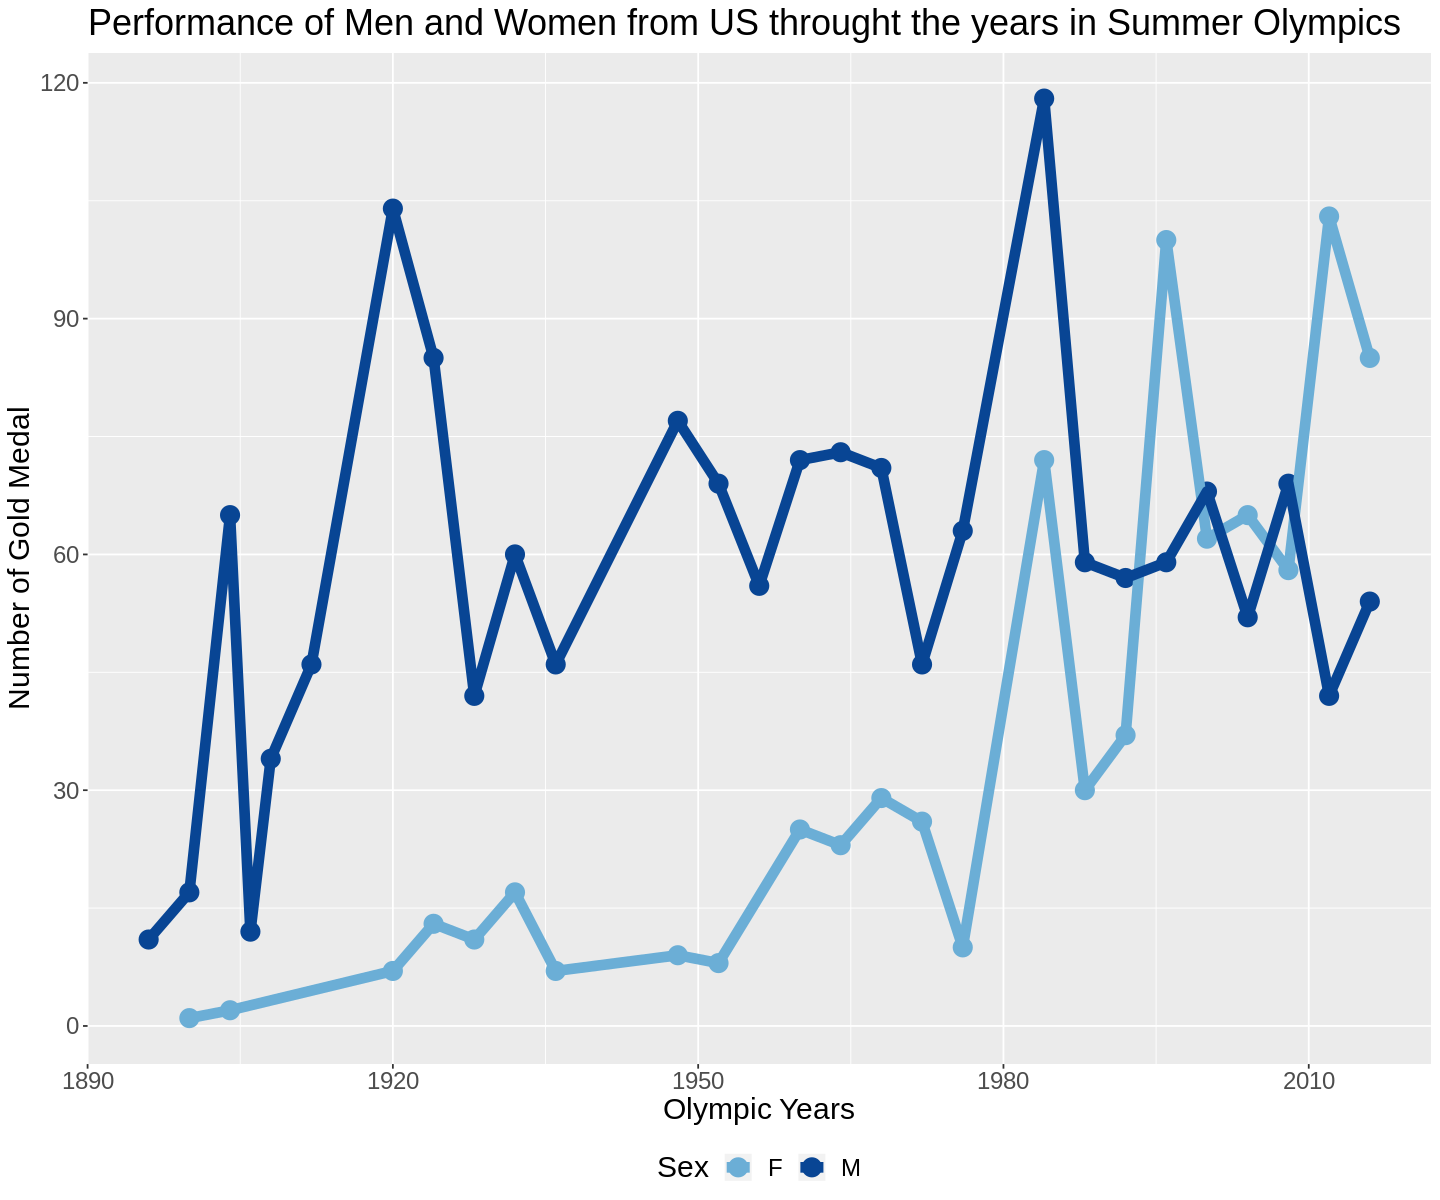

In [495]:
my_colors <- RColorBrewer::brewer.pal(8, "Blues")[1:8]

ggplot(us_gender_medal, aes(x=Year, y=count, color=Sex)) +
    geom_point(size=5) +
    geom_line(size = 3) +
    scale_color_manual(values=c(my_colors[5],my_colors[8]))+
    theme(legend.position="bottom") +
    ggtitle("Performance of Men and Women from US throught the years in Summer Olympics") +
    xlab("Olympic Years") + ylab("Number of Gold Medal")+
 theme(text =element_text (size = 18))


Here we have compared the Gold of the USA team with respect to sex. We could see that the Female athletes/ sports woman are performing better than the male contestants in recent years.

In [418]:
sport_medal  <- olympic_data %>% 
    group_by(Team,Sex,Medal,Sport) %>% 
    filter( Medal =='Gold'&& Team == 'United States' && Season == 'Summer'&& (Sport == 'Swimming' | Sport == 'Athletics' | Sport == 'Basketball' | Sport == 'Football' | Sport == 'Rowing' | Sport == 'Shooting' | Sport == 'Softball' | Sport == 'Volleyball' | Sport == 'Rugby' |Sport == 'Gymnastics' |Sport == 'Wrestling' |Sport == 'Water Polo' | Sport == 'Boxing' | Sport == 'Diving' | Sport == 'Baseball' | Sport == 'Synchronized Swimming' | Sport == 'Equestrianism' ) ) %>% 
    count() %>% arrange_(~ desc(n)) %>% 
    rename('count' = n)  

head(sport_medal)

Team,Sex,Medal,Sport,count
<chr>,<fct>,<fct>,<fct>,<int>
United States,M,Gold,Athletics,409
United States,M,Gold,Swimming,381
United States,F,Gold,Swimming,264
United States,M,Gold,Basketball,186
United States,F,Gold,Athletics,128
United States,M,Gold,Rowing,124


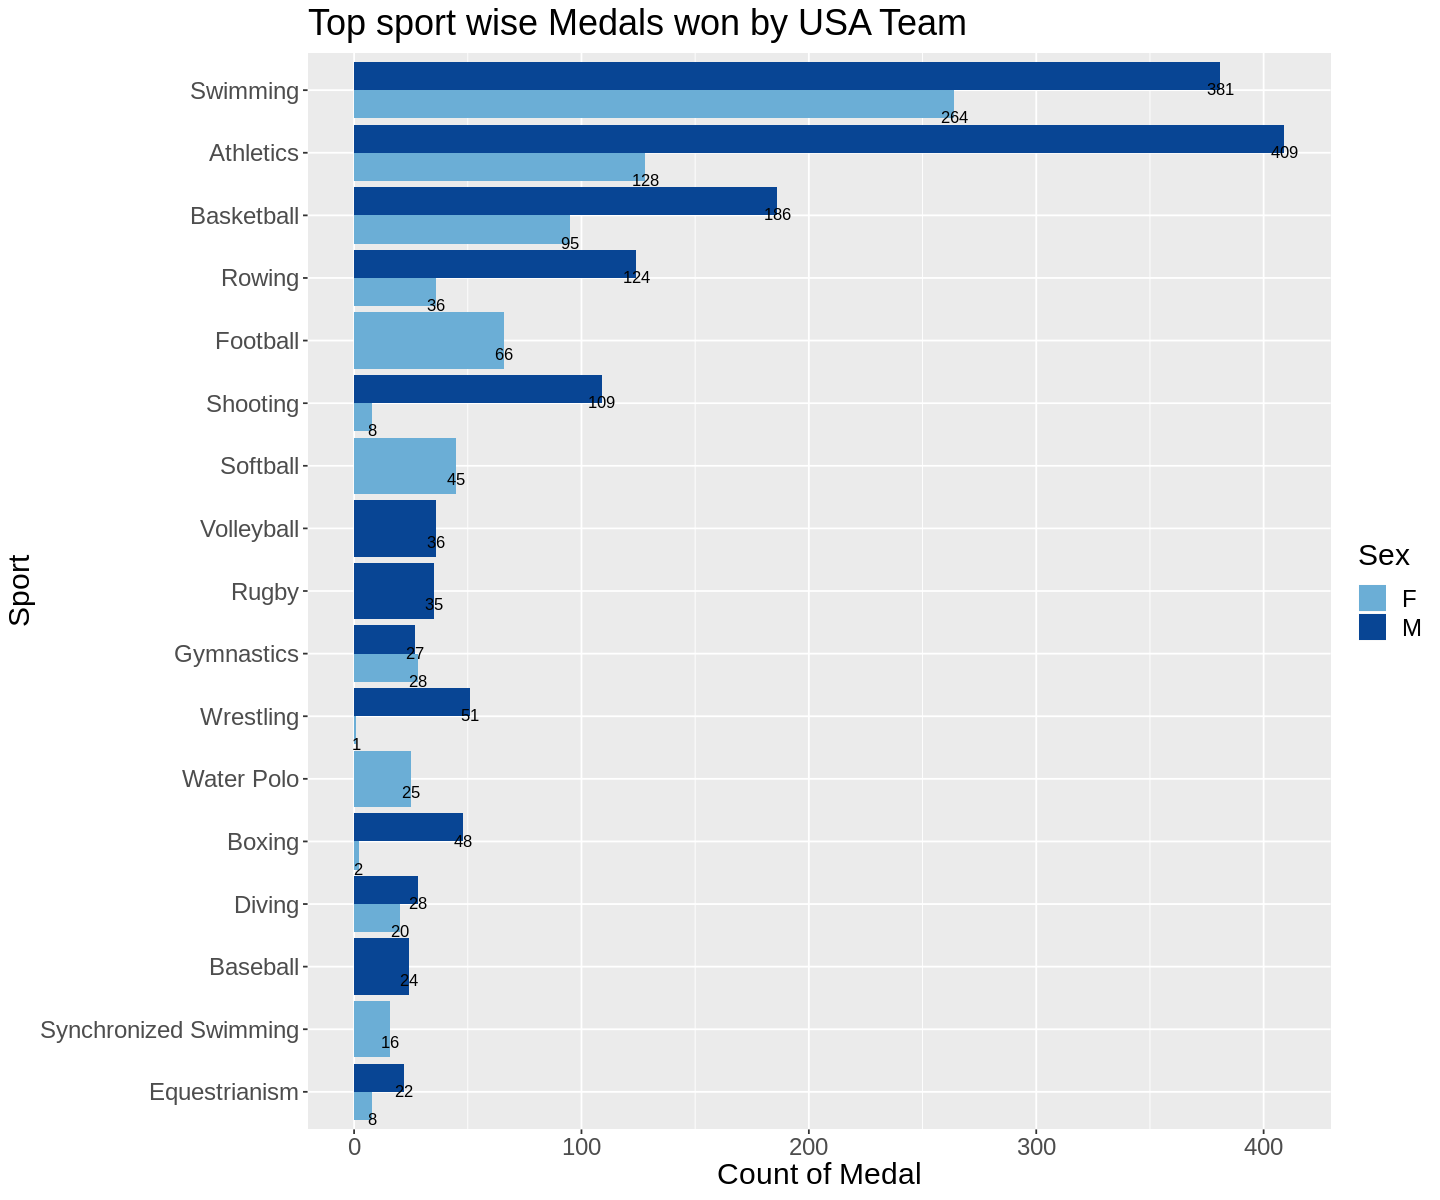

In [496]:
my_colors <- RColorBrewer::brewer.pal(8, "Blues")[1:8]

ggplot(data=sport_medal, aes(x=fct_reorder(Sport,count), y=count, fill=Sex)) +
    geom_bar(stat="identity", position=position_dodge())+
    geom_text(aes(label=count), vjust=1.6, color="Black",
            position = position_dodge(0.9), size=3.5)+
    scale_fill_manual(values=c(my_colors[5],my_colors[8]))+
    ggtitle("Top sport wise Medals won by USA Team ") +
    xlab("Sport") + ylab("Count of Medal") +
 theme(text =element_text (size = 18)) +
    coord_flip()

options(repr.plot.width = 16, repr.plot.height = 10)

here from the graph we can see that the USA team performance is at its best in swimming, Athletics, Basketball and Rowing

---

### - Remember the design analysis questions:

**what, how, who, why?** 

- What are you showing/telling? 
- How are you going to show it (efficiency? visual tasks like comparison, trends, query, etc.) 
- Who is your audience? Why should they care about what you have to tell? What are the **actionable** information they can take from your story? 
- Why are you telling the story? What is your angle, message, point? (make it clear in text AND visuals) 

---

### - Pay attention to the color schemes/palettes:

 - Do NOT use sequential palettes for data attributes that have no ordering.
 - Do NOT use qualitative color schemes for attributes where order matters. 

---

###  - Color coordinate among plots so that the same data attributes have the same color in all plots:

You can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value (especially important for categories). Do not change color of the same category among plots!

---

###  - Perceptual grouping is important! group and/or order values:

People tend to make sense of things and compare better when they are ordered or grouped:  

- In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

- Pie chart: order wedges. 

- In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 

---

### - No lengthy text in x axis:

- **Flip** the axes of a bar chart so that character values (text) are **readable on the y axis** left to right, 

**or** 

- at least, put them slanted in x axis for better readibility. 

---

### - Plot only those data columns and/or subsets that tell an obvious story:

 - **No crowded** scatter plots with useless linear regression lines that don't tell anything.  
 - You do **NOT** have to plot **ALL** your data (most of the time, you should not). 
 - Look at alternative plots to tell your story effectively. 
 - Your plots should be perceived easily and intuitively. 
  
  

---

### - If you have too many classes (discrete variables/categories), try to GROUP them:

- Instead of giving a color to each of the dozen or so categories, you can put them in meaningful groups and color code to reduce clutter. 

- For sequential variables, you can do the same thing by **binning** numbers into bins (like in a histogram). 

- **Stepped color palettes** may be more useful than smooth sequential palettes (especially for comparison in choropleth maps) for a large range of values in an attribute. 

- You can **group/cluster data into meaningful chunks** and display those as bubble charts, networks, geographical regions, etc. 

- Do **NOT** dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be **perceived immediately**. 

---

### - ANNOTATE! ANNOTATE! ANNOTATE!

- **Tell** your audience what they are supposed to see. 

- Use **meaningful** titles with a message/statement, no dry titles. 

- Use nice and concise axis labels (make sure they are large enough).

- Use text annotations (look at the **examples in the lab notebook**).

---

### - THEMING

- **Good looking** charts are more **convincing**! Your audience will have more confidence in your work. 

- **Almost NEVER use the default color palette, default theme, or default fonts.**

- Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 

---

### - Use space wisely!

- **Balance the plots** to use space effectively.

- Pay attention to **data-ink ratio**.

- **HAVE A FLOW left to right, top to bottom**. 

- If you must have a line plot or bar plot with a lot of empty space, try to put text annotations with relevant information in them. 